# **Tutorial 3: Reconstructing Past Changes in Terrestrial Climate**
**Week 1, Day 4, Paleoclimate**

**Content creators:** Sloane Garelick

**Content reviewers:** Yosmely Bermúdez, Dionessa Biton, Katrina Dobson, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Brodie Pearson, Jenna Pearson, Chi Zhang, Ohad Zivan 

**Content editors:** Yosmely Bermúdez, Zahra Khodakaramimaghsoud, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS

# **Tutorial Objectives**

In this tutorial, we’ll explore the Euro2K proxy network, which is a subset of PAGES2K, the database we explored in the first tutorial. We will specifically focus on interpreting temperature change over the past 2,000 years as recorded by proxy records from tree rings, speleothems, and lake sediments. To analyze these datasets, we will group them by archive and create time series plots to assess temperature variations.

During this tutorial you will:

*   Plot temperature records based on three different terrestrial proxies
*   Assess similarities and differences between the temperature records






# Setup

In [1]:
# !pip install pandas
# !pip install numpy

# !pip install cartopy
# !pip install pyleoclim

In [2]:
# imports
import pyleoclim as pyleo
import pandas as pd
import numpy as np
import os
import pooch
import matplotlib.pyplot as plt

In [3]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

# Section 1: Loading terrestrial paleoclimate records

First, we need to download the data. Similar to Tutorial 1, the data is stored as a LiPD file, and we will be using Pyleoclim to format and interpret the data.

In [7]:
# Set the name to save the Euro2k data
fname = "euro2k_data"

    # Download the data
lipd_file_path = pooch.retrieve(
    url="https://osf.io/7ezp3/download/",
    known_hash=None,
    path="./",
    fname=fname,
    processor=pooch.Unzip()
)

In [9]:
# The LiPD object can be used to load datasets stored in the LiPD format.
# In this first case study, we will load an entire library of LiPD files:
d_euro = pyleo.Lipd(os.path.join(".", f"{fname}.unzip", "Euro2k"))

/var/folders/k2/707t_q4135v27q7hpn6490nh0000gp/T/ipykernel_27873/2383682862.py:3: DeprecationWarning: The Lipd class is being deprecated and will be removed in Pyleoclim v1.0.0. Functionalities will instead be handled by the pyLipd package.
  d_euro = pyleo.Lipd(os.path.join(".", f"{fname}.unzip", "Euro2k"))


Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 31 LiPD file(s)
reading: Ocn-RedSea.Felis.2000.lpd
reading: Arc-Forfjorddalen.McCarroll.2013.lpd
reading: Eur-Tallinn.Tarand.2001.lpd
reading: Eur-CentralEurope.Dobrovoln.2009.lpd
reading: Eur-EuropeanAlps.Bntgen.2011.lpd
reading: Eur-CentralandEasternPyrenees.Pla.2004.lpd
reading: Arc-Tjeggelvas.Bjorklund.2012.lpd
reading: Arc-Indigirka.Hughes.1999.lpd
reading: Eur-SpannagelCave.Mangini.2005.lpd
reading: Ocn-AqabaJordanAQ19.Heiss.1999.lpd
reading: Arc-Jamtland.Wilson.2016.lpd
reading: Eur-RAPiD-17-5P.Moffa-Sanchez.2014.lpd
reading: Eur-LakeSilvaplana.Trachsel.2010.lpd
reading: Eur-NorthernSpain.Martn-Chivelet.2011.lpd
reading: Eur-MaritimeFrenchAlps.Bntgen.2012.lpd
reading: Ocn-AqabaJordanAQ18.Heiss.1999.lpd
reading: Arc-Tornetrask.Melvin.2012.lpd
reading: Eur-EasternCarpathianMountains.Popa.2008.lpd
reading: Arc-PolarUrals.Wilson.2015.lpd
reading: Eur-LakeSilvaplana.Larocque-Tobler.2010.lpd
reading: Eur

In this next cell of code, we will use `Lipd.to_tso` to obtain a list of dictionaries that can be iterated upon. Dictionaries are native to Python and can be easily explored as shown below. The first line of the code creates the list of dictionaries while the for loop goes over each dictionary to lift relevant information that would allow us to identify the relevant dictionary for our work and print it out per index:



In [10]:
ts_list = d_euro.to_tso()
for idx, item in enumerate(ts_list):
    print(str(idx)+': '+item['dataSetName']+': '+item['paleoData_variableName'])

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

Once we have our data downloaded and organized, we need to store the data as a `LipdSeriesList`:

In [11]:
ts_SeriesList = d_euro.to_LipdSeriesList()

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

/Users/jennapearson/anaconda3/lib/python3.10/site-packages/pyleoclim/core/lipd.py:267: UserWarning: The timeseries from 11: Eur-CentralandEasternPyrenees.Pla.2004: sampleID could not be coerced into a LipdSeries object, passing
  warnings.warn(txt)


In [12]:
ts_series = pyleo.MultipleSeries(ts_SeriesList)

Next, we can filter all of the data so that we only keep reconstructions from terrestrial archives (tree rings, speleothems and lake sediments).

In [13]:
def filter_data(dataset, archive_type, variable_name):
    """
    Return a MultipleSeries object with the variable record (variable_name) for a given archive_type.
    """
    # Create a list of dictionary that can be iterated upon using Lipd.to_tso method
    ts_list = dataset.to_tso()
    # Append the correct indices for a given value of archive_type and variable_name
    indices = []
    for idx, item in enumerate(ts_list):
        # Check that it is available to avoid errors on the loop
        if 'archiveType' in item.keys():
            # If it's a archive_type, then proceed to the next step
            if item['archiveType'] == archive_type:
                if item['paleoData_variableName'] == variable_name:
                    indices.append(idx)
    print(indices)
    # Create a list of LipdSeries for the given indices
    ts_list_archive_type = []
    for indice in indices:
        ts_list_archive_type.append(pyleo.LipdSeries(ts_list[indice]))

    return pyleo.MultipleSeries(ts_list_archive_type)

# Section 2: Temperature reconstruction

Let's create a new list that only has temperature reconstructions based on proxies from **lake sediments**:

In [14]:
ms_euro_lake = filter_data(d_euro, 'lake sediment', 'temperature')

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

/var/folders/k2/707t_q4135v27q7hpn6490nh0000gp/T/ipykernel_27873/4254118069.py:20: DeprecationWarning: The LipdSeries class is being deprecated and will be removed in Pyleoclim v1.0.0. It will be replaced by the geoSeries class (currently in development).
  ts_list_archive_type.append(pyleo.LipdSeries(ts_list[indice]))


Let's create a new list that only has temperature reconstructions based on proxies from **tree rings**:

In [15]:
ms_euro_tree = filter_data(d_euro, 'tree', 'temperature')

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

/var/folders/k2/707t_q4135v27q7hpn6490nh0000gp/T/ipykernel_27873/4254118069.py:20: DeprecationWarning: The LipdSeries class is being deprecated and will be removed in Pyleoclim v1.0.0. It will be replaced by the geoSeries class (currently in development).
  ts_list_archive_type.append(pyleo.LipdSeries(ts_list[indice]))


Let's create a new list that only has temperature reconstructions based on proxies from **speleothems**:

In [16]:
ms_euro_spel = filter_data(d_euro, 'speleothem', 'd18O')

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

/var/folders/k2/707t_q4135v27q7hpn6490nh0000gp/T/ipykernel_27873/4254118069.py:20: DeprecationWarning: The LipdSeries class is being deprecated and will be removed in Pyleoclim v1.0.0. It will be replaced by the geoSeries class (currently in development).
  ts_list_archive_type.append(pyleo.LipdSeries(ts_list[indice]))


Here is a map of the location of the terrestrial proxy records we'll be looking at. **Blue** dots are lake sediments, **green** dots are tree rings, and **yellow** dots are speleothems:


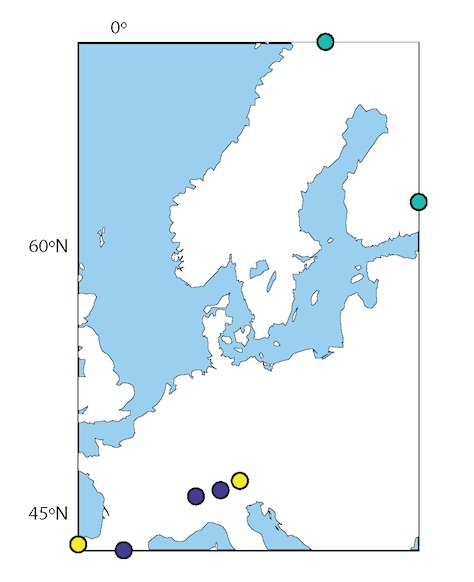

Since we are going to compare temperature datasets based on different terrestrial climate archives (lake sediments, tree rings and speleothems), the quantitative values of the measurements in each record will differ (i.e., the lake sediment and tree ring data are temperature in degrees C, but the speleothem data is oxygen isotopes in per mille). Therefore, to more easily and accurately compare temperature between the records, it's helpful to standardize the data as we did in tutorial 2. The `.standardize ()` function removes the estimated mean of the time series and divides by its estimated standard deviation.

In [17]:
#Standardize the data
spel_stnd = ms_euro_spel.standardize()
lake_stnd = ms_euro_lake.standardize()
tree_stnd = ms_euro_tree.standardize()

Now we can use Pyleoclim functions to create three stacked plots of this data with lake sediment records on top, tree ring reconstructions in the middle and speleothem records on the bottom:

/Users/jennapearson/anaconda3/lib/python3.10/site-packages/pyleoclim/core/multipleseries.py:265: UserWarning: Time unit "BP" unknown; triggering defaults
  new_ts = ts.convert_time_unit(time_unit=time_unit)


Text(0.5, 1.2, 'Speleothems')

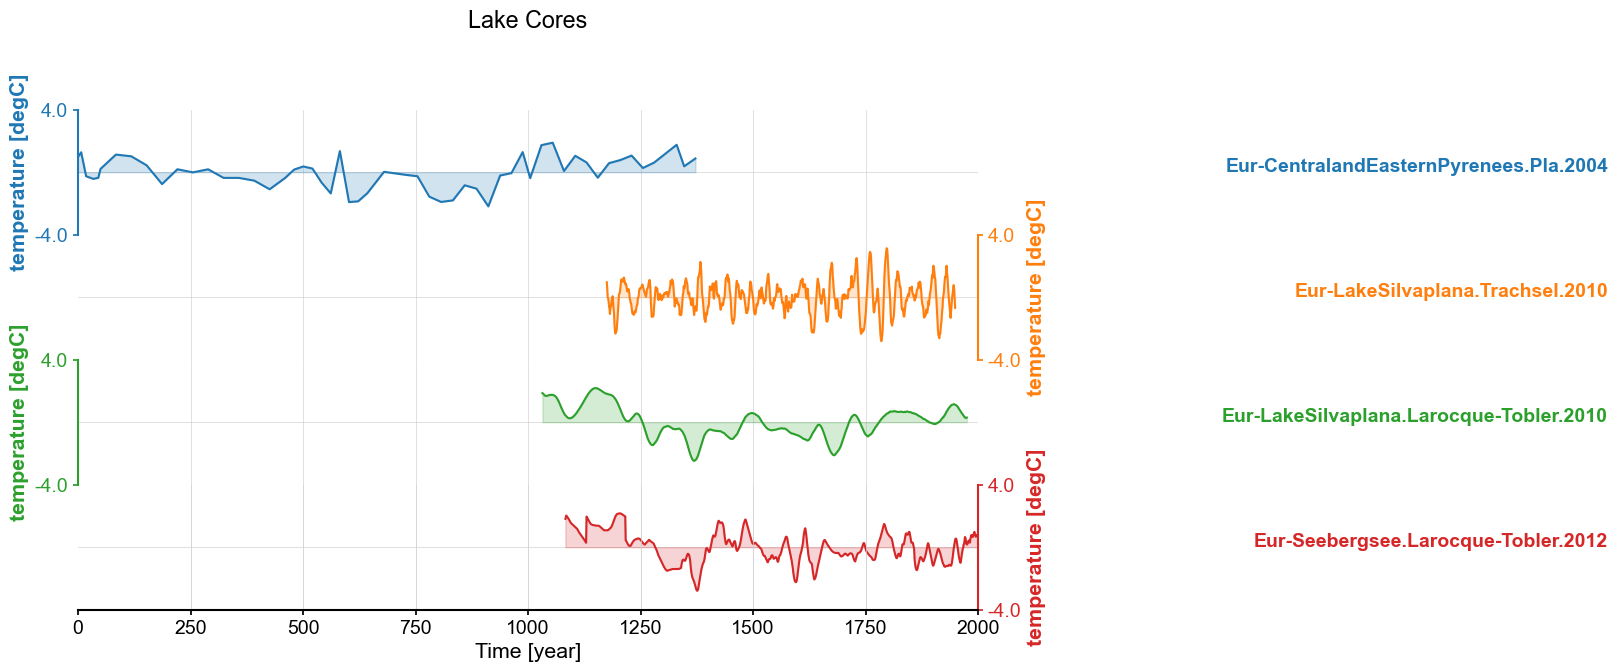

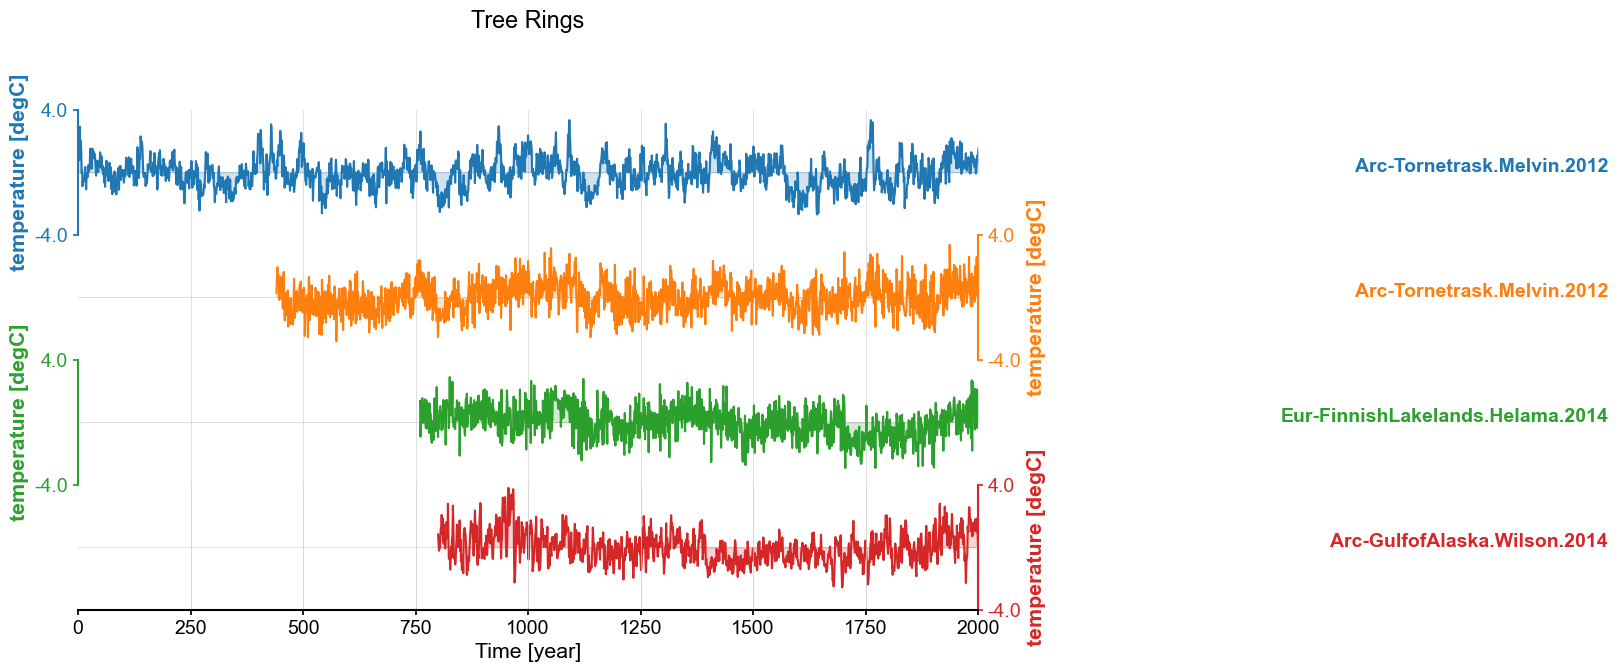

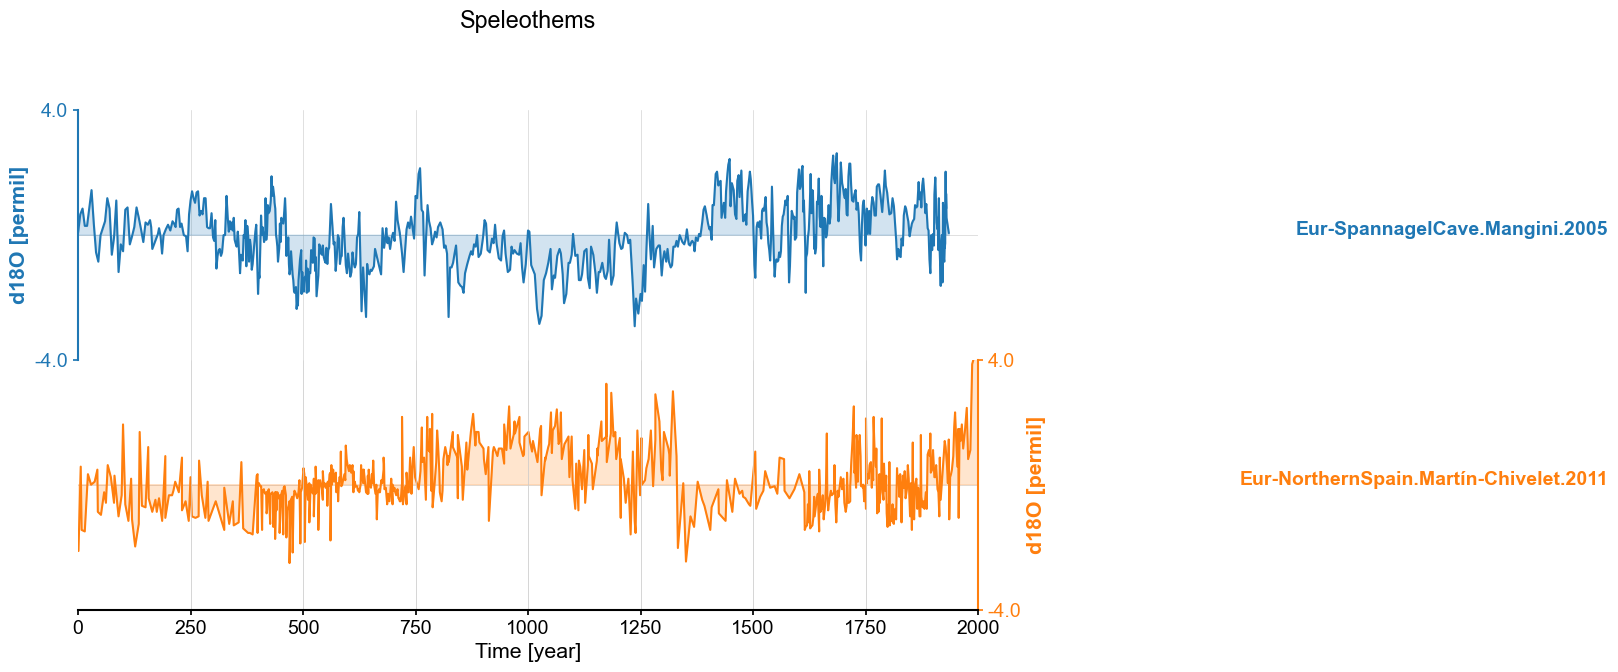

In [18]:
ax=lake_stnd.stackplot(label_x_loc=1.7,xlim=[0,2000],v_shift_factor =1,figsize=[9,5], time_unit="year")
ax[0].suptitle("Lake Cores", y=1.2)

ax=tree_stnd.stackplot(label_x_loc=1.7,xlim=[0,2000],v_shift_factor =1,figsize=[9,5], time_unit="year")
ax[0].suptitle("Tree Rings", y=1.2)

ax=spel_stnd.stackplot(label_x_loc=1.7,xlim=[0,2000],v_shift_factor =1,figsize=[9,5], time_unit="year")
ax[0].suptitle("Speleothems", y=1.2)

# ohad comment: fixed the code, and included the title. 
# the original code also had color parameter. not sure for what... the title? I can add if it's that important. 

## Questions 2

Using the plots we just made (and recalling that all of these records are from Europe), let's make some inferences about the temperature data over the past 2,000 years:

1.   Do the three proxy types record the same patterns? 
2.   Do the temperature records based on a single proxy type record similar patterns?
3.   What is the long term temperature trend during this period of time?
4.   What might be causing the more frequent variations in temperature?

In [14]:
## to remove the explanation  
print ("""
Write your observations here. Strong internal variability is observed within all three types of proxy records at interannual to interdecadal scales. Several factors can cause these variations, such as solar forcings and volcanic activities.
We can also observe the recent enhancement of ENSO variance from the plots. 
""")


Write your observations here. Strong internal variability is observed within all three types of proxy records at interannual to interdecadal scales. Several factors can cause these variations, such as solar forcings and volcanic activities.
We can also observe the recent enhancement of ENSO variance from the plots. 



## Coding Exercises 2

1. Try plotting these temperature records zoomed into just the past 200 years to assess more recent temperature change.

Text(0.5, 1.2, 'Speleothems')

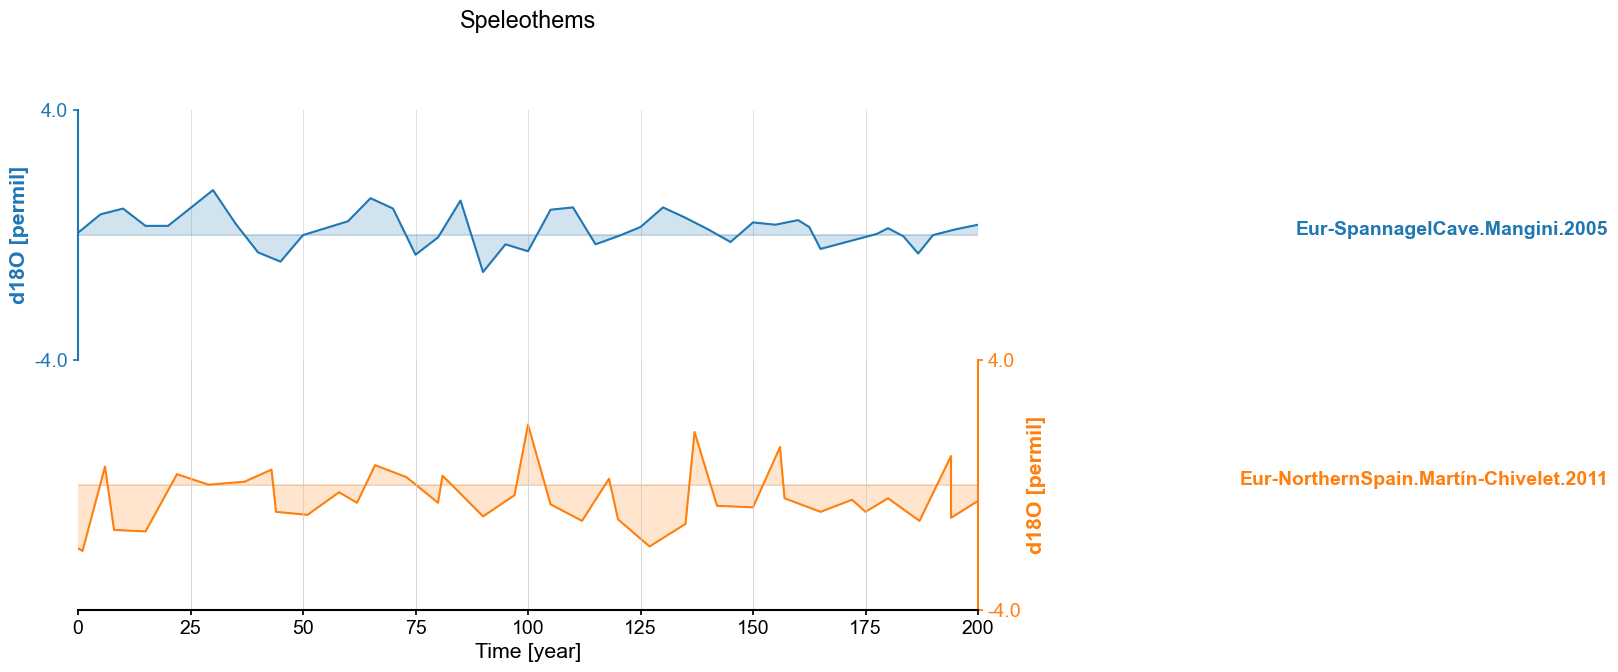

In [25]:
# to_remove solution
ax=spel_stnd.stackplot(label_x_loc=1.7,xlim=[0,200],v_shift_factor =1,figsize=[9,5], time_unit="year")
ax[0].suptitle("Speleothems", y=1.2)


## Bonus Questions
If you'd like to further explore these datasets, here are some ideas for additional analyses:
*   Recall during W1D1 when we learned about calculating and plotting a running mean of climate time series data. Try plotting a running average of these time series to assess long-term temperature change over the past 2,000 years.
*   Try plotting these temperature records zoomed into just the past 200 years to assess more recent temperature change.


>**_Chi comment_** Maybe we can make a coding exercise here?

>**_Ohad comment_** only thing I can think of is to plot a different part of the dataset. interseting enough? 


# **Summary**
In this tutorial, we explored how to use the Euro2k proxy network to decipher changes in temperature over the past 2,000 years as depicted by proxy records from tree rings, speleothems, and lake sediments. To analyze these diverse datasets, we categorized them based on their archive type and constructed time series plots to examine temperature fluctuations.

During this exploration, we plotted temperature records derived from three different terrestrial proxies and evaluated the similarities and differences between these temperature records. With this groundwork, we were prepared to make informed inferences about the temperature data spanning the past 2,000 years.

# **Resources**

Code for this tutorial is based on an existing notebook from LinkedEarth that provides instruction on [working with LiPD files](https://github.com/LinkedEarth/PyleoTutorials/blob/main/notebooks/L1_working_with_LiPD.ipynb). 

Data from the following sources are used in this tutorial:

*   Euro2k database: PAGES2k Consortium., Emile-Geay, J., McKay, N. et al. A global multiproxy database for temperature reconstructions of the Common Era. Sci Data 4, 170088 (2017). https://doi.org/10.1038/sdata.2017.88